# Health Insurance Cross Sell Prediction

### Business background
##### Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company.
##### Meanwhile, building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,LabelEncoder,OrdinalEncoder
from category_encoders import TargetEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_auc_score,roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Deep Learning
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

/var/folders/kp/sndy1z714b36d8j4h21ggmym0000gn/T/ipykernel_1504/136016408.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Load Data

In [2]:
df = pd.read_csv('train.csv')
df = df.set_index('id')

In [3]:
df

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                      
1         Male   44                1         28.0                   0   
2         Male   76                1          3.0                   0   
3         Male   47                1         28.0                   0   
4         Male   21                1         11.0                   1   
5       Female   29                1         41.0                   1   
...        ...  ...              ...          ...                 ...   
381105    Male   74                1         26.0                   1   
381106    Male   30                1         37.0                   1   
381107    Male   21                1         30.0                   1   
381108  Female   68                1         14.0                   0   
381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
id                                                                        
1        > 2 Years            Yes         40454.0                  26.0   
2         1-2 Year             No         33536.0                  26.0   
3        > 2 Years            Yes         38294.0                  26.0   
4         < 1 Year             No         28619.0                 152.0   
5         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381105    1-2 Year             No         30170.0                  26.0   
381106    < 1 Year             No         40016.0                 152.0   
381107    < 1 Year             No         35118.0                 160.0   
381108   > 2 Years            Yes         44617.0                 124.0   
381109    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
id                         
1           217         1  
2           183         0  
3            27         1  
4           203         0  
5            39         0  
...         ...       ...  
381105       88         0  
381106      131         0  
381107      161         0  
381108       74         0  
381109      237         0  

[381109 rows x 11 columns]

## EDA

In [89]:
profile = ProfileReport(df, title="Insurance Report", explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Get basic information about the dataset
# (like shape, data type, missing values, duplicates,etc.)
print(f'The dataset has {df.shape[0]} rows, and {df.shape[1]} columns \n')
df.info()

The dataset has 381109 rows, and 11 columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 43.0+ MB


In [6]:
# It seams this dataset contains numerical and categorical data types,
# need to convert to expected format later
# Now check the missing value and duplicates.
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There is no missing values

In [7]:
print(df.duplicated().sum())
print(f'This dataset has {df.duplicated().sum() / df.shape[0] * 100}% of duplicates')

269
This dataset has 0.0705834813662233% of duplicates


In [8]:
# Since it only has less than 0.1% of duplicates, so we just drop them
df.drop_duplicates(inplace=True)
df.shape

(380840, 11)

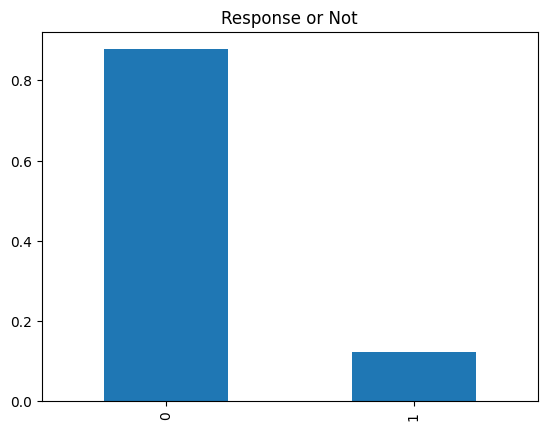

In [9]:
# First let see the target label
df['Response'].value_counts(normalize=True).plot(kind = 'bar')
plt.title('Response or Not');

In [10]:
# We can see from above the target data is imbalanced, so we need to implement random sampling or SMOT later.

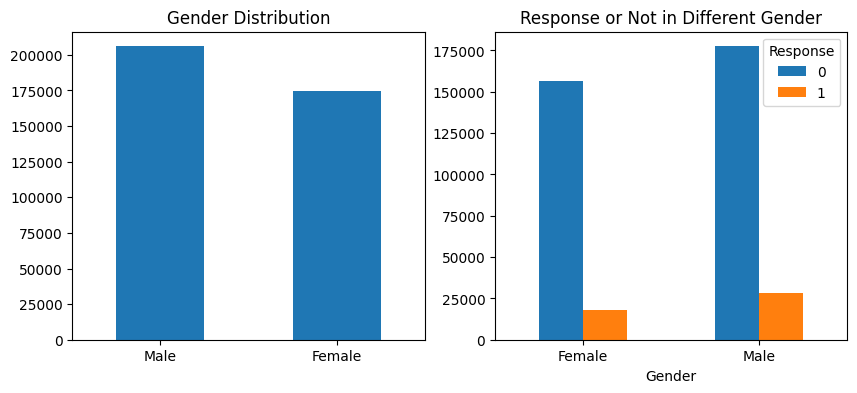

In [11]:
# Now we explore and analyze correlations between targer and other columns
# The relation between gender and response
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
df['Gender'].value_counts().plot(kind='bar',ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xticklabels(['Male', 'Female'], rotation=0)
df.groupby(['Gender','Response'])['Response'].count().unstack().plot(kind='bar',ax = axes[1])
axes[1].set_title('Response or Not in Different Gender')
plt.xticks(rotation=0);

In [12]:
# More males are willing to purchase a vehicle insurance than females

In [13]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [14]:
plot_cols = ['Driving_License','Previously_Insured','Vehicle_Damage','Vehicle_Age']

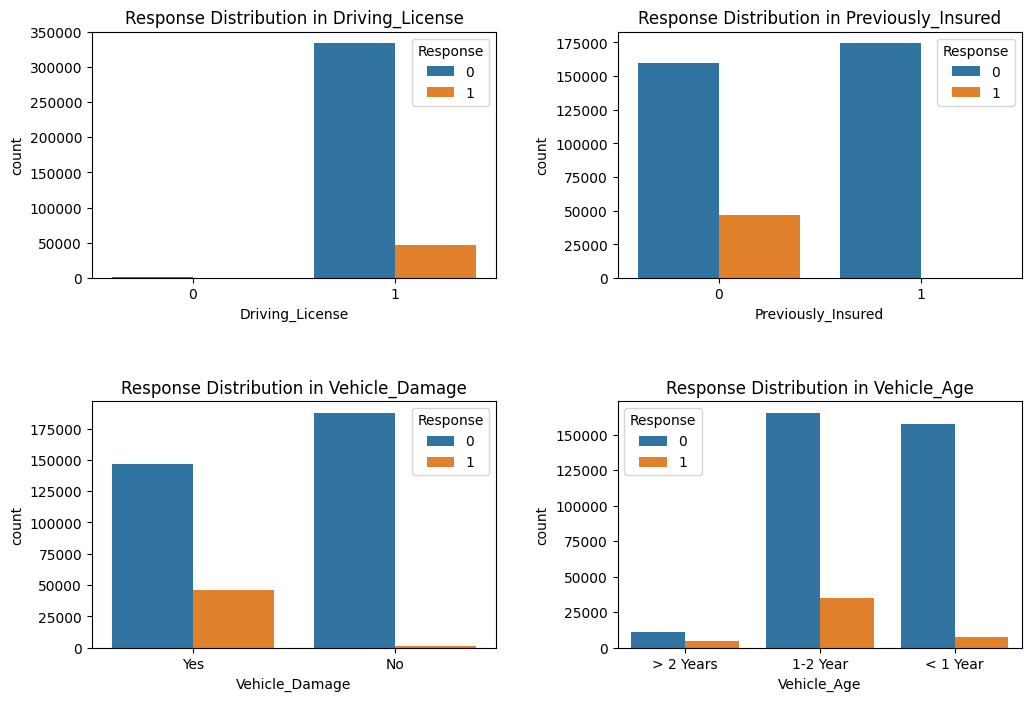

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for i,j in enumerate(axes.flatten()):
    sns.countplot(x=plot_cols[i], hue = 'Response',\
                  data = df[[plot_cols[i],'Response']],ax=j)
    j.set_title(f'Response Distribution in {plot_cols[i]}');

In [16]:
# From the above plots, we can see that when people has driving license,
# the vehicle has damaged before or have previously insured then more likly willing to get insured
# However, the majortiy of data are having driving license, means it doesn't have much
# impact on the target, we decided to drop this column later

In [17]:
# Do the similar exploration for numerical columns
df.describe()

Age  Driving_License    Region_Code  Previously_Insured  \
count  380840.000000    380840.000000  380840.000000       380840.000000   
mean       38.823593         0.997868      26.388307            0.458208   
std        15.513206         0.046126      13.229907            0.498251   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   380840.000000         380840.000000  380840.000000  380840.000000  
mean     30584.016078            112.030225     154.344607       0.122584  
std      17203.258664             54.206194      83.670240       0.327960  
min       2630.000000              1.000000      10.000000       0.000000  
25%      24426.000000             29.000000      82.000000       0.000000  
50%      31678.500000            133.000000     154.000000       0.000000  
75%      39408.000000            152.000000     227.000000       0.000000  
max     540165.000000            163.000000     299.000000       1.000000

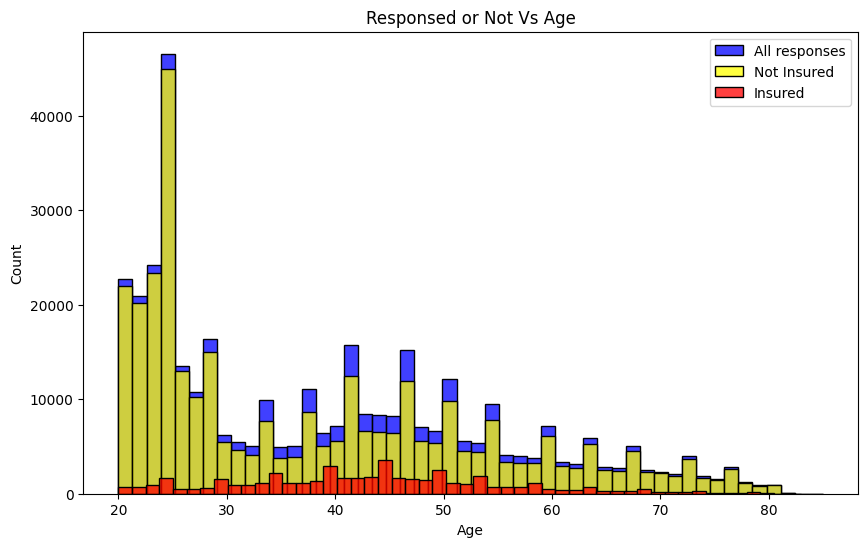

In [18]:
# Plot a hist to show people distribution among different ages in different response types
plt.figure(figsize=(10,6))
sns.histplot(x=df['Age'],color='blue',bins=50,label='All responses')
sns.histplot(df.Age[df.Response==0],bins = 50,color='yellow',label='Not Insured')
sns.histplot(df.Age[df.Response==1],bins = 50,color='red',label='Insured')
plt.title('Responsed or Not Vs Age')
plt.legend();

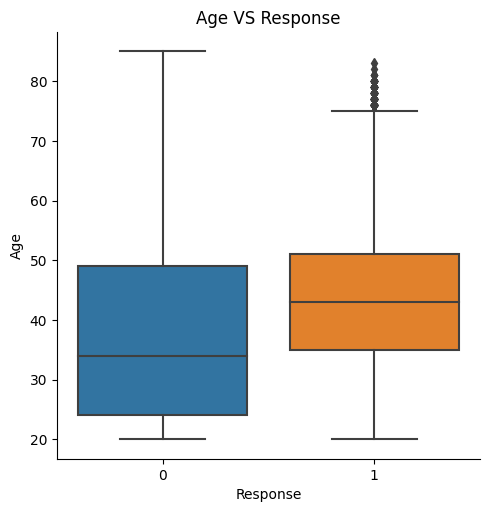

In [19]:
# Plot boxplot to check outliers
sns.catplot(x="Response",y="Age", data=df[['Age','Response']], kind='box')
plt.title("Age VS Response");

In [20]:
# We can see from above, for people aged between 20-30 are willing to NOT purchase an insurance,
# While, for age in range 40 - 50 who are more willing to purchase an insurance.
# Means age is an important feature to predict the target label

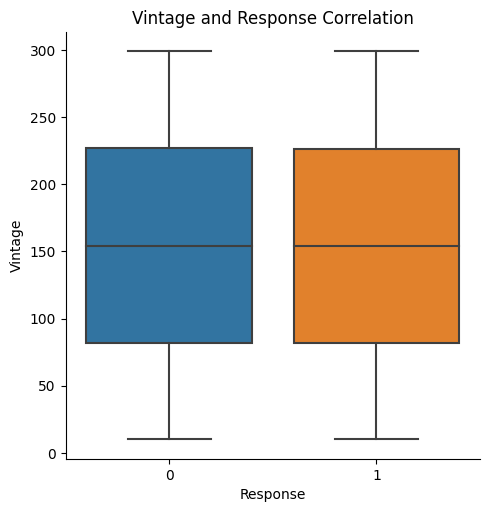

In [21]:
# See Vintage and Response correlation
sns.catplot(x="Response", y="Vintage", data=df[['Vintage','Response']], kind="box")
plt.title("Vintage and Response Correlation");

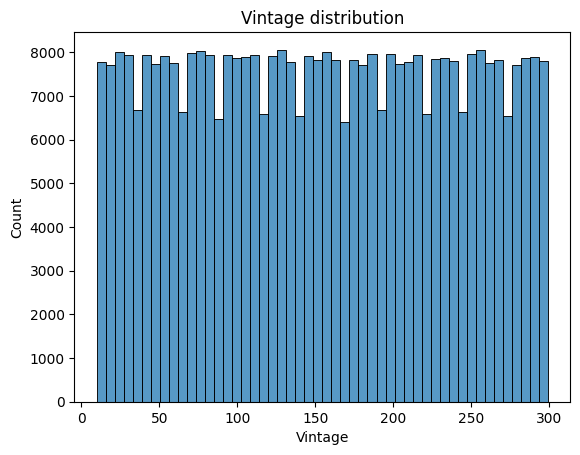

In [22]:
sns.histplot(df['Vintage'],bins=50)
plt.title('Vintage distribution');

In [23]:
# Vintages stands for number of Days for a customer since associated with the company
# The distribution of response among different vintages means quite silimar, which signifies
# no significate effect to the response

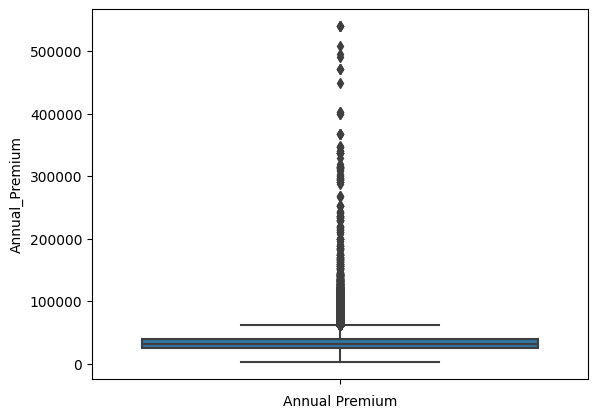

In [24]:
# Last check the Annual_Premium column
# See outliers using boxplot
sns.boxplot(y=df["Annual_Premium"])
plt.xlabel("Annual Premium");

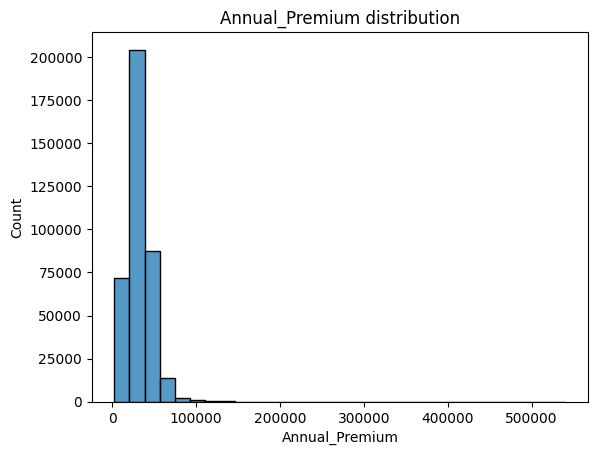

In [25]:
sns.histplot(x = df["Annual_Premium"],bins = 30)
plt.title('Annual_Premium distribution');

In [26]:
# From above, it seams it exists outliers and highly skewed, need to clean it later

In [27]:
# Region_code column has the numerical data type,
# however it's more logical to convert to categorical later
# Maybe we could try bin? or some encoding techniques?
df['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [28]:
# Same scenario for Policy_Sales_Channel, bin or other encoding?
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

## Baseline Model

In [29]:
# For a binary classification problem, 
# normally logisticregression is a goog benchmark in the industry

In [30]:
X = df.drop(['Response'],axis = 1)
y = df['Response']

In [31]:
# Use SMOT to handle imbalanced dataset
X = pd.get_dummies(X,drop_first=True)

In [32]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Random over sampling using SMOTE
smt = SMOTE(random_state=42)
X_train,y_train = smt.fit_resample(X_train,y_train)

In [34]:
# check if balanced
y_train.value_counts()

0    233813
1    233813
Name: Response, dtype: int64

In [35]:
# Build the baseline model
base_model = LogisticRegression(random_state=42)

base_model.fit(X_train,y_train)
y_predict = base_model.predict(X_test)

print(classification_report(y_test,y_predict))
print(f'AUC-ROC score is {roc_auc_score(y_test,y_predict)}')

              precision    recall  f1-score   support

           0       0.95      0.69      0.80    100342
           1       0.25      0.75      0.37     13910

    accuracy                           0.70    114252
   macro avg       0.60      0.72      0.59    114252
weighted avg       0.87      0.70      0.75    114252

AUC-ROC score is 0.7179774072743109


## Data Preprocessing & Feature Engineering

In [36]:
# Define a function to detect outliers and replace them with upper or lower values
def Outlier_Remove(col):
    q1 = np.percentile(df[col],25,method = 'midpoint')
    q3 = np.percentile(df[col],75,method = 'midpoint')
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return np.clip(df[col],lower,upper)

In [37]:
df['AP_Cleaned'] = Outlier_Remove('Annual_Premium')

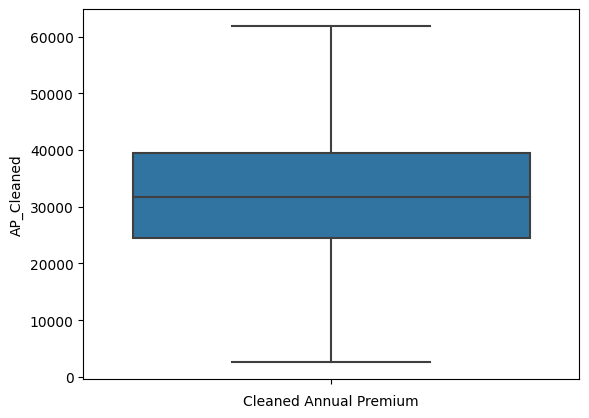

In [38]:
# Using boxplot to check again
sns.boxplot(y=df["AP_Cleaned"])
plt.xlabel('Cleaned Annual Premium');

In [39]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'AP_Cleaned'],
      dtype='object')

In [40]:
# Drop unnecessary columns
data = df.drop(['Response','Annual_Premium'],axis=1)

In [41]:
# Check data type again, and classify to categorical and numerical 
# First need to convert some data to the desired data type
# define a function to convert type
def type_convert(col,toType):
    if data[col].dtype != toType:
        data[col] = data[col].astype(toType)
    return

In [42]:
# Define columns need to convert type
convert_cols = ['Driving_License','Region_Code','Previously_Insured','Policy_Sales_Channel']
for i in convert_cols:
    type_convert(i,object)

In [43]:
# Check results
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 1 to 381109
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                380840 non-null  object 
 1   Age                   380840 non-null  int64  
 2   Driving_License       380840 non-null  object 
 3   Region_Code           380840 non-null  object 
 4   Previously_Insured    380840 non-null  object 
 5   Vehicle_Age           380840 non-null  object 
 6   Vehicle_Damage        380840 non-null  object 
 7   Policy_Sales_Channel  380840 non-null  object 
 8   Vintage               380840 non-null  int64  
 9   AP_Cleaned            380840 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 32.0+ MB


### One hot coding

In [44]:
# Define columns that need to one-hot encoding
oh_cols = ['Gender','Vehicle_Damage','Driving_License','Previously_Insured']
temp_oh = pd.get_dummies(data[oh_cols])
data = data.drop(oh_cols,axis=1).join(temp_oh)

In [45]:
# Set up bins for Age column
# The min and max value for age is 20 and 80, so we decided to use .qcut function to set bins
# we decide to set 4 bins
q_boundaries = [20, 35, 50, 65, 80]
q_labels = ['20-35_ages', '35-50_ages', '50-65_ages', '65-80_ages']
data['Age_bins'] = pd.cut(df['Age'], bins = q_boundaries, labels=q_labels)

# Use one-hot again to encoding
temp_bins = pd.get_dummies(data['Age_bins'])
data = data.drop(['Age','Age_bins'],axis=1).join(temp_bins)

In [46]:
# apply log function to age column to make it more normal distribution
# data['Age'] = np.log(data['Age'])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 1 to 381109
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Region_Code           380840 non-null  object 
 1   Vehicle_Age           380840 non-null  object 
 2   Policy_Sales_Channel  380840 non-null  object 
 3   Vintage               380840 non-null  int64  
 4   AP_Cleaned            380840 non-null  float64
 5   Gender_Female         380840 non-null  uint8  
 6   Gender_Male           380840 non-null  uint8  
 7   Vehicle_Damage_No     380840 non-null  uint8  
 8   Vehicle_Damage_Yes    380840 non-null  uint8  
 9   Driving_License_0     380840 non-null  uint8  
 10  Driving_License_1     380840 non-null  uint8  
 11  Previously_Insured_0  380840 non-null  uint8  
 12  Previously_Insured_1  380840 non-null  uint8  
 13  20-35_ages            380840 non-null  uint8  
 14  35-50_ages            380840 non-null  uint8  
 15  

In [48]:
# Now split the dataset before scaling and transforming to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.3,random_state=42)

In [49]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((266588, 17), (266588,), (114252, 17), (114252,))

### Target & Ordinal Encoding

In [50]:
# Before doing the categorical encoding, let define a numerical_col to do scaler
# number_cols = ['Vintage','AP_Cleaned','Region_Code','Policy_Sales_Channel','Age']
number_cols = ['Vintage','AP_Cleaned']

# Define a individual pipeline
# steps = [('std', StandardScaler())]
steps = [('mm', MinMaxScaler())]

numeric_pipeline = Pipeline(steps=steps)

In [51]:
# Target Encoding for Region_Code , Policy_Sales_Channel columns
target_cols = ['Region_Code' , 'Policy_Sales_Channel']

# Label Encoding for Vehicle_Age column
or_cols = ['Vehicle_Age']

In [52]:
# Define transform and pipeline
transformers = [('ordinal', OrdinalEncoder(), or_cols),
                ('target', TargetEncoder(), target_cols),
               ('scale', numeric_pipeline, number_cols)]

preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

### Train the model

In [53]:
# Then combine to a final single pipeline
steps=[('col_trans', preprocessor),
      ('smt', SMOTE(random_state=42)),
      ('lr', LogisticRegression(random_state=42))]

final_pipe = Pipeline(steps=steps)

In [54]:
# Fit and Predict
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Vehicle_Age']),
                                                 ('target', TargetEncoder(),
                                                  ['Region_Code',
                                                   'Policy_Sales_Channel']),
                                                 ('scale',
                                                  Pipeline(steps=[('mm',
                                                                   MinMaxScaler())]),
                                                  ['Vintage', 'AP_Cleaned'])])),
                ('smt', SMOTE(random_state=42)),
                ('lr', LogisticRegression(random_state=42))])

In [55]:
y_pred = final_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'AUC-ROC score is {roc_auc_score(y_test,y_pred)}')

              precision    recall  f1-score   support

           0       0.99      0.66      0.79    100342
           1       0.27      0.94      0.42     13910

    accuracy                           0.69    114252
   macro avg       0.63      0.80      0.61    114252
weighted avg       0.90      0.69      0.74    114252

AUC-ROC score is 0.795904744092959


In [56]:
# pip install xgboost

In [57]:
from xgboost import XGBClassifier

In [58]:
# Since this is a binary classification problem, so we need to consider using classification algorithms
# We want to compare the results between LogisticRegression, DecissionTree, RandomForest and XGBoost
# define a function to fit each model
# Then use loop to print results
def model_result(model_name):
    steps=[('col_trans', preprocessor),('smt', SMOTE()),('model', model_name)]
    final_pipe = Pipeline(steps=steps)
    final_pipe.fit(X_train, y_train)
    y_pre = final_pipe.predict(X_test)
    y_score = final_pipe.predict_proba(X_test)[:,1]
    report = classification_report(y_test, y_pre)
    score = roc_auc_score(y_test,y_pre)
    return y_score,report,score

In [59]:
# Define a function to plot roc-auc curve
def roc_auc_plot(model_name):    
    plt.title('f{model_name} curve')
    plt.xlabel('FPR (Precision)')
    plt.ylabel('TPR (Recall)')   
    y_score = model_result(model_name)[0]
    fpr, tpr, _ = roc_curve(y_test, y_score) 
    plt.plot(fpr,tpr,color='darkorange')
    plt.plot((0,1), ls='dashed',color='navy')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()

LogisticRegression result: 
              precision    recall  f1-score   support

           0       0.99      0.66      0.79    100342
           1       0.28      0.93      0.42     13910

    accuracy                           0.69    114252
   macro avg       0.63      0.80      0.61    114252
weighted avg       0.90      0.69      0.75    114252

AUC-ROC score is 0.7960507859669177


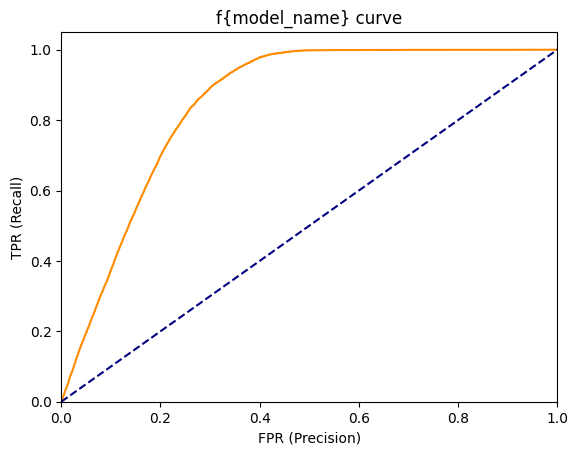

DecisionTreeClassifier result: 
              precision    recall  f1-score   support

           0       0.91      0.88      0.89    100342
           1       0.29      0.34      0.31     13910

    accuracy                           0.82    114252
   macro avg       0.60      0.61      0.60    114252
weighted avg       0.83      0.82      0.82    114252

AUC-ROC score is 0.6113436991570783


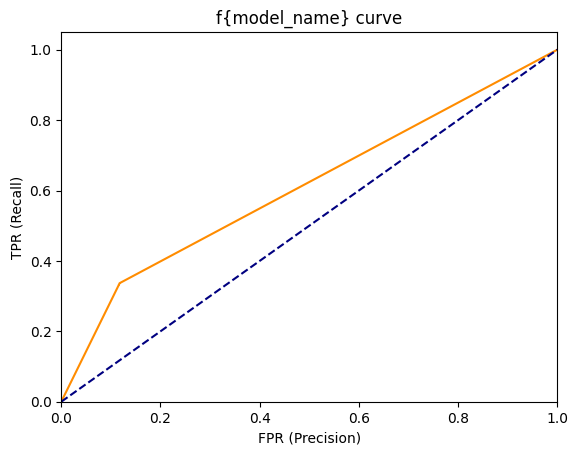

RandomForestClassifier result: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90    100342
           1       0.32      0.35      0.33     13910

    accuracy                           0.83    114252
   macro avg       0.61      0.62      0.62    114252
weighted avg       0.84      0.83      0.83    114252

AUC-ROC score is 0.6227164585256453


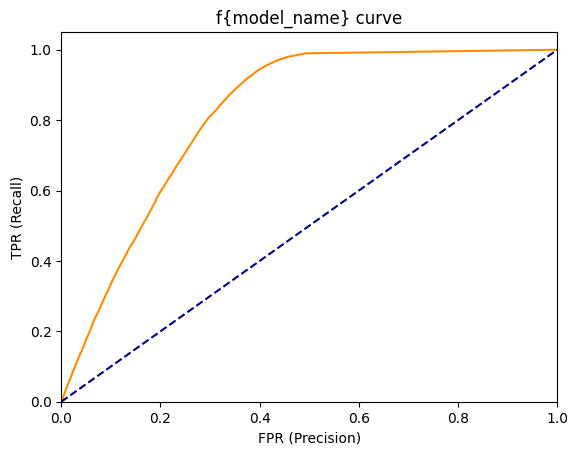

XGBClassifier result: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90    100342
           1       0.34      0.40      0.37     13910

    accuracy                           0.83    114252
   macro avg       0.63      0.65      0.63    114252
weighted avg       0.84      0.83      0.84    114252

AUC-ROC score is 0.6461387761977688


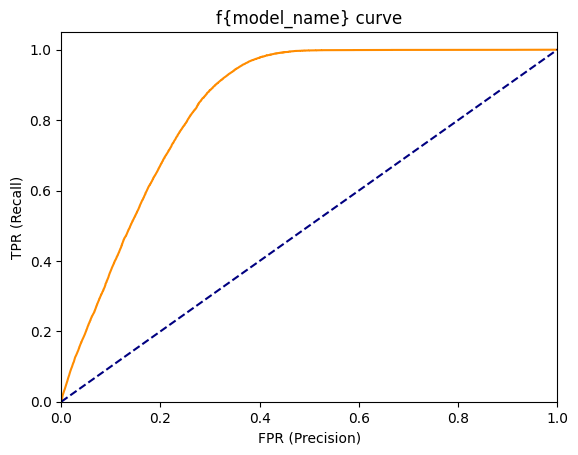

KNeighborsClassifier result: 
              precision    recall  f1-score   support

           0       0.94      0.77      0.84    100342
           1       0.27      0.64      0.38     13910

    accuracy                           0.75    114252
   macro avg       0.61      0.70      0.61    114252
weighted avg       0.86      0.75      0.79    114252

AUC-ROC score is 0.7014828717848223


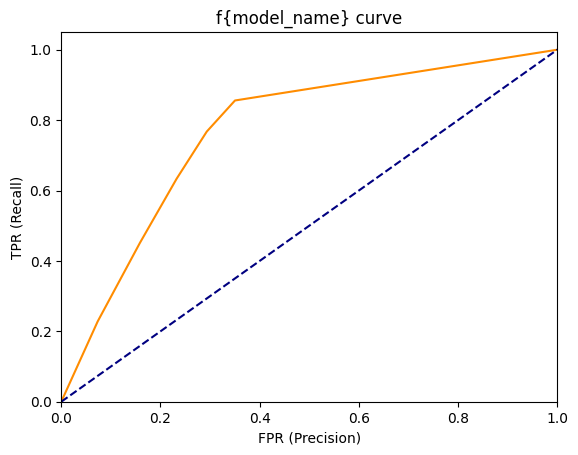

GaussianNB result: 
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100342
           1       0.25      0.98      0.40     13910

    accuracy                           0.64    114252
   macro avg       0.62      0.79      0.57    114252
weighted avg       0.90      0.64      0.70    114252

AUC-ROC score is 0.7853148028136296


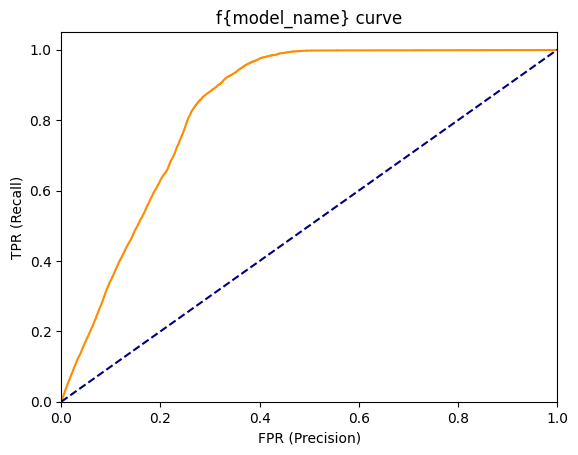

In [60]:
# Define the list of models need to compare
model_lst = [LogisticRegression(random_state=42),DecisionTreeClassifier(random_state=42),\
             RandomForestClassifier(random_state=42),XGBClassifier(random_state=42),\
            KNeighborsClassifier(),GaussianNB()]
for i in model_lst:
    print(f'{type(i).__name__} result: ')
    y_score,report,score = model_result(i)
    print(report)
    print(f'AUC-ROC score is {score}')
    roc_auc_plot(i)

By comparing with different models, we find the GaussianNB has the best performance. It has the higest recall ratio, which is we are more focusing on, becasue we want to do predict the customers who are willing to purchase a vehicle insurance. While, LogisticRegression has the best AUC-ROC curve with also reletive high recal ratio at 93%.

### Feature Selection

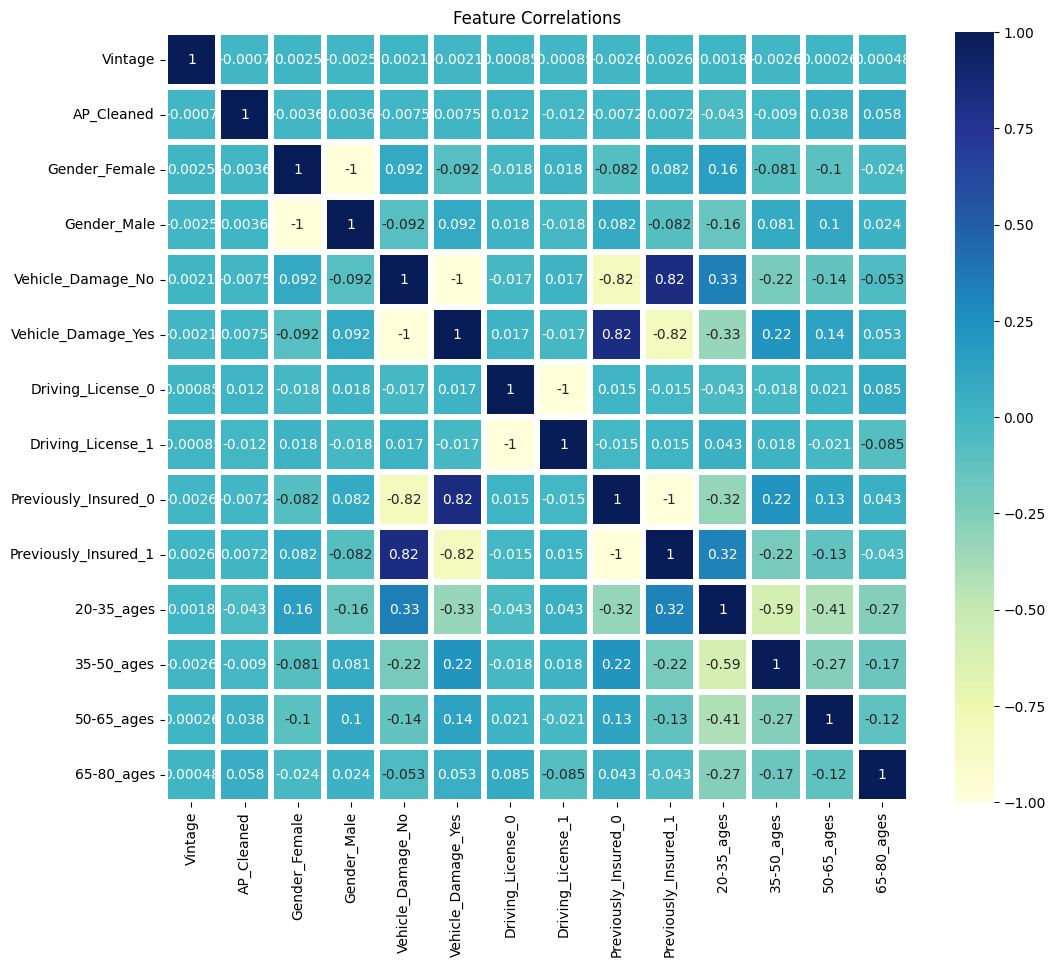

In [61]:
# Plot heatmap to get the general idea about the correlations
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(),linewidth = 3, annot = True, cmap="YlGnBu")
plt.title('Feature Correlations');

In [62]:
# We can see that if two features are highly correlated,
# we will eleminate one of them because they tend to overfit the data
# It seams that some features have highly related with the target label
# need to do the feature selection later

In [63]:
# Window to the pipe to get the transformed values and column names
X_train_transformed = final_pipe[0].transform(X_train) # get the transformed values
feature_names = preprocessor.get_feature_names_out() # get column names

# Convert into a DataFrame with column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_train_transformed_df.shape
# X_train_transformed_df.head()

(266588, 17)

In [64]:
# Apply chi-squared test for feature selection
selector = SelectKBest(score_func=chi2, k='all')
X_chi = selector.fit_transform(X_train_transformed_df, y_train)
selector.scores_

array([1.90996072e+03, 8.59908693e+01, 1.12711757e+03, 1.61851150e-01,
       1.90387077e+01, 3.94009990e+02, 3.34481925e+02, 1.68943406e+04,
       1.65555604e+04, 3.09391093e+01, 6.83917154e-02, 1.42663023e+04,
       1.68612370e+04, 3.72047089e+03, 5.81246172e+03, 4.71844162e+02,
       2.58868581e+02])

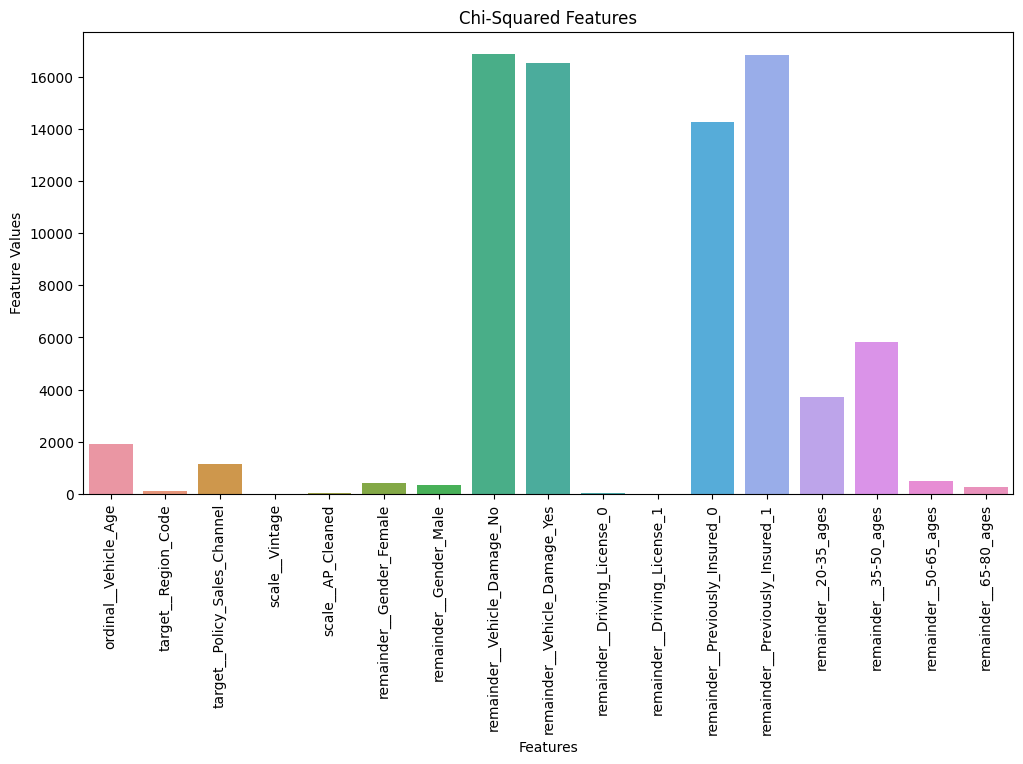

In [65]:
# Plot the results to visualize
plt.figure(figsize=(12,6))
sns.barplot(x = feature_names, y = selector.scores_)
plt.xticks(rotation=90)
plt.title('Chi-Squared Features')
plt.xlabel('Features')
plt.ylabel('Feature Values'); 

###### Some features look to be much stronger than any other feature. Consider top features which are significate important

In [66]:
# Select the top 13 featurs which are visiable in the plot above
temp_df = pd.Series(selector.scores_,index=feature_names)
selected_features = temp_df.sort_values(ascending=False).head(13).index

In [67]:
selected_features

Index(['remainder__Vehicle_Damage_No', 'remainder__Previously_Insured_1',
       'remainder__Vehicle_Damage_Yes', 'remainder__Previously_Insured_0',
       'remainder__35-50_ages', 'remainder__20-35_ages',
       'ordinal__Vehicle_Age', 'target__Policy_Sales_Channel',
       'remainder__50-65_ages', 'remainder__Gender_Female',
       'remainder__Gender_Male', 'remainder__65-80_ages',
       'target__Region_Code'],
      dtype='object')

In [68]:
# Re-define the dataset after feature selection
X_train_selected = X_train_transformed_df[selected_features]
X_test_transformed = final_pipe[0].transform(X_test) # get the transformed values
# Convert into a DataFrame with column names
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
X_test_selected = X_test_transformed_df[selected_features]

In [69]:
X_train_selected.shape,X_test_selected.shape

((266588, 13), (114252, 13))

In [70]:
# Re-train the model to see the results
smt = SMOTE(random_state=42)
X_train_selected,y_train_selected = smt.fit_resample(X_train_selected,y_train)

In [71]:
for i in [LogisticRegression(random_state=42),DecisionTreeClassifier(random_state=42),\
             RandomForestClassifier(random_state=42),XGBClassifier(random_state=42),\
            GaussianNB()]:
    model = i
    model.fit(X_train_selected,y_train_selected)
    y_p = model.predict(X_test_selected)
    print(f'{model} result:')
    print(classification_report(y_test,y_p))
    print(f'AUC-ROC score is {roc_auc_score(y_test,y_p)}\n')

LogisticRegression(random_state=42) result:
              precision    recall  f1-score   support

           0       0.99      0.65      0.78    100342
           1       0.27      0.95      0.42     13910

    accuracy                           0.68    114252
   macro avg       0.63      0.80      0.60    114252
weighted avg       0.90      0.68      0.74    114252

AUC-ROC score is 0.7959380794032361

DecisionTreeClassifier(random_state=42) result:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82    100342
           1       0.29      0.83      0.42     13910

    accuracy                           0.73    114252
   macro avg       0.63      0.77      0.62    114252
weighted avg       0.88      0.73      0.77    114252

AUC-ROC score is 0.7700706961057311

RandomForestClassifier(random_state=42) result:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82    100342
           1       0.29

We can see after selecting important features, the results getting better especially for DecisionTree, RandomForest and XGBoost, however, considering the LogisticRegression gives us the best result as well. Meanwhile,GaussianNB is still being considered as a good model since it has a high recall ratio.

### Hyperparameter Tunning

In [72]:
# From above we get the best model is LogisticRegression, however the XGBooster has the quite
# similar results, so we prefer do the tunning for these two models.

In [75]:
# hyperparameter tuning with LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1.0, 0.1, 0.01],
    'solver': ['liblinear', 'saga','lbfgs'],
    'class_weight': [None, 'balanced'],
    'max_iter': [50,100]
}

lr = LogisticRegression(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(lr, param_grid, cv=kf, scoring=['roc_auc'], verbose=2, n_jobs=-1,refit='roc_auc')

gs.fit(X_train_selected,y_train_selected)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   5.5s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   6.0s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   5.1s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   4.6s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.9s


/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   5.2s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   5.7s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=saga; total time=  11.4s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   5.0s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.9s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l1, solver=liblinear; total time=   6.5s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l1, solver=liblinear; total time=   4.0s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l1, solver=saga; total time=   4.0s


/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   5.8s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=saga; total time=  11.5s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1,

/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn

[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=liblinear; total time=   9.3s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=saga; total time=  11.5s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   4.5s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l1, solver=liblinear; total time=   5.2s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l1, solver=liblinear; total time=   4.5s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l1, solver=saga; total time=   4.3s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l2, solver=saga; total time=  11.1s
[CV] END C=1.0, class_weight=balanced, 

/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=liblinear; total time=   9.7s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=saga; total time=  11.5s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=  16.2s
[CV] END C=1.0, class_weight=balanced, max_iter=5

/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=  16.2s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l2, solver=saga; total time=  11.2s
[CV] END C=1.0, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   4.6s
[CV] END C=1.0, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=  17.2s
[CV] END C=0.1, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   4.1s
[CV] END C=0.1, class_weight=None, max_iter=50, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=  10.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   3.4s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, max_i

/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=1.0, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   6.5s
[CV] END C=1.0, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   4.9s
[CV] END C=1.0, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=  17.2s
[CV] END C=0.1, class_weight=None, max_iter=50, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=0.1, class_weight=None, max_iter=50, penalty=l2, solver=saga; total time=   2.9s
[CV] END C=0.1, class_weight=None, max_iter=50, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=  24.4s
[CV] END C=0.1, class_weight=balanced, max_iter=50, penalty=l1, solver=saga; total time=   6.4s
[CV] END C=0.1, class_weight=balan

/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV] END C=0.1, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   4.3s
[CV] END C=0.1, class_weight=None, max_iter=50, penalty=l2, solver=saga; total time=   4.3s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   5.8s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [1.0, 0.1, 0.01],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [50, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             refit='roc_auc', scoring=['roc_auc'], verbose=2)

In [76]:
gs.best_params_

{'C': 0.1,
 'class_weight': None,
 'max_iter': 50,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [77]:
# Train LogisticRegression with best params_
lr = LogisticRegression(C=0.1,class_weight=None,max_iter=50,penalty = 'l1',solver='liblinear',random_state=42)
lr.fit(X_train_selected,y_train_selected)
y_p = lr.predict(X_test_selected)
print(classification_report(y_test,y_p))
print(f'AUC-ROC score is {roc_auc_score(y_test,y_p)}\n')

              precision    recall  f1-score   support

           0       0.99      0.64      0.78    100342
           1       0.27      0.95      0.42     13910

    accuracy                           0.68    114252
   macro avg       0.63      0.80      0.60    114252
weighted avg       0.90      0.68      0.74    114252

AUC-ROC score is 0.7960412728511624



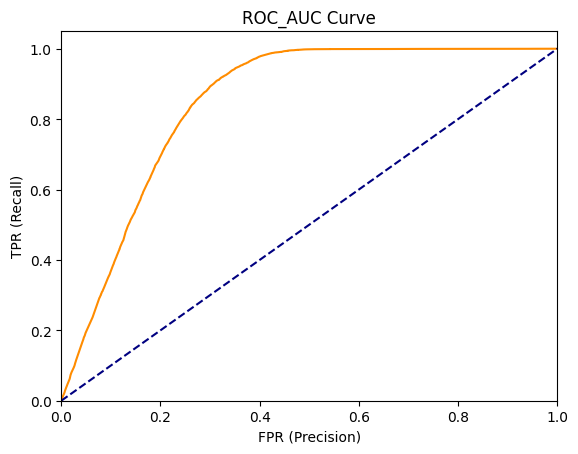

In [78]:
plt.title('ROC_AUC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')   
y_score = gs.predict_proba(X_test_selected)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score) 
plt.plot(fpr,tpr,color='darkorange')
plt.plot((0,1), ls='dashed',color='navy')
plt.xlim([0.0, 1.0]) # set starts from origin
plt.ylim([0.0, 1.05]);# set scale bigger to show all the graph

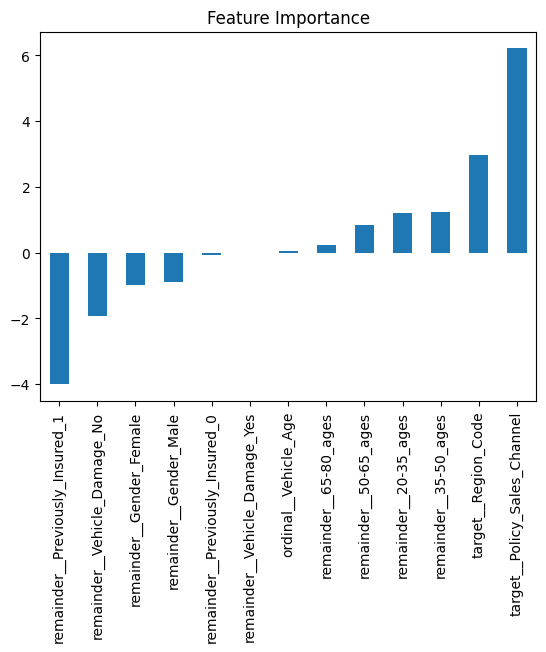

In [79]:
# Plot feature importance
pd.Series(lr.coef_[0], index=X_train_selected.columns).sort_values().plot(kind='bar')
plt.title('Feature Importance');

In [80]:
# From the plots we can see different from LogisticRegression, this time the policy sales channel
# plays a more important weight for predicting

In [81]:
# hyperparameter tuning with XGBooster
parameters = {
    'xgb__n_estimators': [10,30,50],
    'xgb__max_leaves': [1, 5, 7, 9],
    'xgb__max_depth': [5,7,10]
}

xgb_classifier = XGBClassifier(booster='gbtree')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(xgb_classifier, parameters, cv=kf, scoring=['f1', 'roc_auc'], verbose=2, n_jobs=-1, refit='f1')

gs.fit(X_train_selected,y_train_selected)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[13:02:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgb__max_depth", "xgb__max_leaves", "xgb__n_estimators" } are not used.



GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'xgb__max_depth': [5, 7, 10],
                         'xgb__max_leaves': [1, 5, 7, 9],
                         'xgb__n_estimators': [10, 30, 50]},
             refit='f1', scoring=['f1', 'roc_auc'], verbose=2)

[CV] END C=0.1, class_weight=balanced, max_iter=50, penalty=l2, solver=saga; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=  29.3s
[CV] END C=0.01, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   5.0s
[CV] END C=0.01, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   5.3s
[CV] END C=0.01, class_weight=None, max_iter=50, penalty=l1, solver=saga; total time=   5.5s
[CV] END C=0.01, class_weight=None, max_iter=50, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=0.01, class_weight=None, max_iter=50, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=  12.3s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=0.01, class_weight=balanced, max_it

[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l1, solver=liblinear; total time=  11.1s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=1.0, class_weight=None, max_iter=50, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   6.7s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   4.1s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=1.0, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=  16.0s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END C=1.0, class_weight=balanced, max_iter=50, penalty=l2, solver=saga; total time=  11.3s
[CV] END C=1.0, class_weight=bal

[12:51:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgb__max_depth", "xgb__max_leaves", "xgb__n_estimators" } are not used.

[CV] END xgb__max_depth=5, xgb__max_leaves=1, xgb__n_estimators=30; total time=  30.5s
[12:51:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgb__max_depth", "xgb__max_leaves", "xgb__n_estimators" } are not used.

[CV] END xgb__max_depth=5, xgb__max_leaves=5, xgb__n_estimators=10; total time=  31.5s
[12:52:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgb__max_depth", "xgb__max_leaves", "xgb__n_estimators" } are not used.

[CV] END xgb__max_depth=5, xgb__max_leaves=5, xgb__n_estimators=30; total time=  31.5s
[12:52:46] WARNING: /Users/runner/work/xgboost/xgboost/pyt

[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=  11.7s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   3.4s
[12:51:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgb__max_depth", "xgb__max_leaves", "xgb__n_estimators" } are not used.

[CV] END xgb__max_depth=5, xgb__max_leaves=1, xgb__n_estimators=30; total time=  30.6s
[12:51:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgb__max_depth", "xgb__max_leaves", "xgb__n_estimators" } are not used.

[CV] END xgb__max_depth=5, xgb__max_leaves=1, xgb__n_estimators=30; total time=  31.3s
[12:52:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgb__max_depth", 

In [82]:
gs.best_params_

{'xgb__max_depth': 5, 'xgb__max_leaves': 1, 'xgb__n_estimators': 10}

In [83]:
# Train XGBoost with best params_
xgb = XGBClassifier(n_estimators = 10,max_depth = 5,max_leaves = 1,random_state=42)
xgb.fit(X_train_selected,y_train_selected)
y_p = xgb.predict(X_test_selected)
print(classification_report(y_test,y_p))
print(f'AUC-ROC score is {roc_auc_score(y_test,y_p)}\n')

              precision    recall  f1-score   support

           0       0.99      0.67      0.80    100342
           1       0.28      0.93      0.43     13910

    accuracy                           0.70    114252
   macro avg       0.63      0.80      0.61    114252
weighted avg       0.90      0.70      0.75    114252

AUC-ROC score is 0.7983649298264064



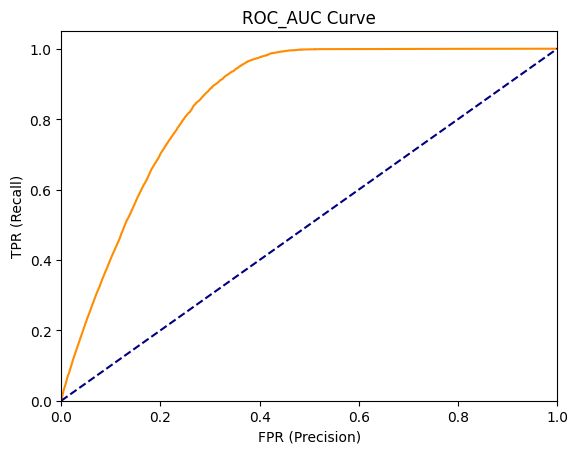

In [84]:
plt.title('ROC_AUC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')   
y_score = gs.predict_proba(X_test_selected)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score) 
plt.plot(fpr,tpr,color='darkorange')
plt.plot((0,1), ls='dashed',color='navy')
plt.xlim([0.0, 1.0]) # set starts from origin
plt.ylim([0.0, 1.05]);# set scale bigger to show all the graph

### Model Stacking

In [85]:
# Stacking is an ensemble learning technique to combine multiple classification models
# via a meta-classifier. Since this is a classification problem, I plan to stack some popular
# classification models as base model, then use logisticregression as the meta-classifier
# to fit based on the outputs

In [86]:
from sklearn.ensemble import StackingClassifier

In [87]:
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr',LogisticRegression(C=0.1,class_weight=None,max_iter=50,penalty = 'l1',solver='liblinear',random_state=42)),
    ('xgb',XGBClassifier(n_estimators = 10,max_depth = 5,max_leaves = 1,random_state=42))]

sm = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(random_state=42))

sm.fit(X_train_selected,y_train_selected)

y_p = sm.predict(X_test_selected)
print(classification_report(y_test,y_p))
print(f'AUC-ROC score is {roc_auc_score(y_test,y_p)}\n')

              precision    recall  f1-score   support

           0       0.97      0.73      0.83    100342
           1       0.30      0.82      0.43     13910

    accuracy                           0.74    114252
   macro avg       0.63      0.78      0.63    114252
weighted avg       0.89      0.74      0.78    114252

AUC-ROC score is 0.7752516988592042



In [155]:
# Try use different base model to compare the results
estimators = [
    ('nb',GaussianNB()),
    ('dt', DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=1,min_samples_split=2,random_state=42)),
    ('lr', LogisticRegression(C=0.1,class_weight=None,max_iter=50,penalty = 'l1',solver='liblinear',random_state=42)),
    ('rf',RandomForestClassifier()),
    ('xgb',XGBClassifier(n_estimators = 10,max_depth = 5,max_leaves = 1,random_state=42))]

sm = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

sm.fit(X_train_selected,y_train_selected)

y_p = sm.predict(X_test_selected)
print(classification_report(y_test,y_p))
print(f'AUC-ROC score is {roc_auc_score(y_test,y_p)}\n')

[CV] END ..................................priors=[0.2, 0.8]; total time=   0.3s
[CV] END ..................................priors=[0.5, 0.5]; total time=   0.3s
[CV] END ........................................priors=None; total time=   0.3s
[CV] END ..................................priors=[0.5, 0.5]; total time=   0.3s
[CV] END ..................................priors=[0.2, 0.8]; total time=   0.3s
[CV] END ..................................priors=[0.5, 0.5]; total time=   0.3s
[CV] END ..................................priors=[0.2, 0.8]; total time=   0.3s
[CV] END ..................................priors=[0.8, 0.2]; total time=   0.2s
[CV] END ........................................priors=None; total time=   0.3s
[CV] END ..................................priors=[0.5, 0.5]; total time=   0.2s
[CV] END ..................................priors=[0.8, 0.2]; total time=   0.2s
[CV] END ........................................priors=None; total time=   0.3s
[CV] END ...................

From the above we can see the stacked model provides a better score than some single model,and the auc-roc scores are around 0.77. However, it seams that the single model XGBoost, LogisticRegression or GaussianNB have the better results.

### Deep Learning

In [157]:
# Use MLPClassifier from scikit-learn for classification problem
# Test on the feature selected dataset
# We define 3 hidden layers with 20 neurons for each
nn = MLPClassifier((20, 20, 20), activation='relu')

nn.fit(X_train_selected,y_train_selected)

y_p_dl = nn.predict(X_test_selected)
print(classification_report(y_test,y_p_dl))
print(f'AUC-ROC score is {roc_auc_score(y_test,y_p_dl)}')

              precision    recall  f1-score   support

           0       0.99      0.66      0.79    100342
           1       0.27      0.94      0.43     13910

    accuracy                           0.69    114252
   macro avg       0.63      0.80      0.61    114252
weighted avg       0.90      0.69      0.74    114252

AUC-ROC score is 0.7973924319015882


In [158]:
# Seams it hits the best score range, but doesn't imporve too much.

In [159]:
# Use keras model
# First try all features
# Create Keras Model with 2 hidden layers, 100 neurons for each hidden layer
# activation = 'relu',activation = 'sigmoid'

# balanced the dataset
smt = SMOTE(random_state=42)
X_train_dl,y_train_dl = smt.fit_resample(X_train_transformed_df,y_train)

model_dl = Sequential()
model_dl.add(Dense(30, input_dim=17, activation='relu'))
model_dl.add(keras.layers.Dropout(0.5)) # reduce overfitting
model_dl.add(Dense(30, activation='relu'))
model_dl.add(keras.layers.Dropout(0.5))
model_dl.add(Dense(30, activation='relu'))
model_dl.add(keras.layers.Dropout(0.5)) # reduce overfitting
model_dl.add(Dense(1, activation='sigmoid'))

# Compile model             
model_dl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_dl.fit(X_train_dl, y_train_dl, epochs=20,validation_data=(X_test_transformed_df, y_test))

Epoch 1/20
14614/14614 [==============================] - 8s 526us/step - loss: 0.4580 - accuracy: 0.7787 - val_loss: 0.4506 - val_accuracy: 0.7276
Epoch 2/20
14614/14614 [==============================] - 8s 523us/step - loss: 0.4437 - accuracy: 0.7874 - val_loss: 0.4661 - val_accuracy: 0.6896
Epoch 3/20
14614/14614 [==============================] - 8s 525us/step - loss: 0.4419 - accuracy: 0.7892 - val_loss: 0.4691 - val_accuracy: 0.7197
Epoch 4/20
14614/14614 [==============================] - 8s 515us/step - loss: 0.4414 - accuracy: 0.7905 - val_loss: 0.4682 - val_accuracy: 0.6934
Epoch 5/20
14614/14614 [==============================] - 8s 547us/step - loss: 0.4410 - accuracy: 0.7901 - val_loss: 0.4895 - val_accuracy: 0.6556
Epoch 6/20
14614/14614 [==============================] - 8s 564us/step - loss: 0.4403 - accuracy: 0.7918 - val_loss: 0.4926 - val_accuracy: 0.6903
Epoch 7/20
14614/14614 [==============================] - 8s 522us/step - loss: 0.4404 - accuracy: 0.7912 - val_

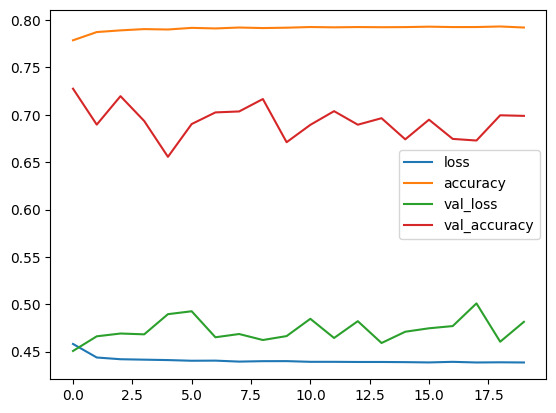

In [160]:
pd.DataFrame(history.history).plot();

In [161]:
y_p_dl = model_dl.predict(X_test_transformed_df)
y_pred_dl = np.round(y_p_dl)
print(classification_report(y_test,y_pred_dl))
print(f'AUC-ROC score is {roc_auc_score(y_test,y_pred_dl)}')

3571/3571 [==============================] - 1s 230us/step
              precision    recall  f1-score   support

           0       0.98      0.67      0.80    100342
           1       0.28      0.93      0.43     13910

    accuracy                           0.70    114252
   macro avg       0.63      0.80      0.61    114252
weighted avg       0.90      0.70      0.75    114252

AUC-ROC score is 0.7963344398820305


In [1]:
# We find these two deep learning models give quite similar results compared with previous models
# We don't get much improved scores after using deep learning model

### Model Interpretation

In [163]:
# Create Permutation importance for the deep learning model to make it more visibale
# It will shuffle the values in a single column, make predictions using the dataset.
# Use these predictions and the true target values to calculate the loss.
# That performance deterioration measures the importance of the variable.
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(nn, random_state=42)

perm.fit(X_train_selected, y_train_selected)

eli5.show_weights(perm, feature_names=X_train_selected.columns.tolist())

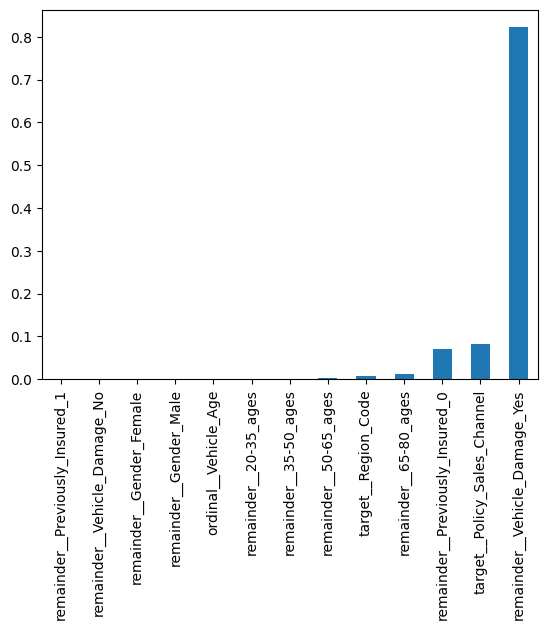

In [88]:
## get prepare the train set for decissiontree regressor under the surrogate model
dt_mi = DecisionTreeRegressor()

# Get predicted probabilities
# Get second column because it's the 1's label
dt_mi.fit(X_train_selected,xgb.predict_proba(X_train_selected)[:,1])

#plot the surrogate model
pd.Series(dt_mi.feature_importances_, index=X_train_selected.columns).sort_values().plot(kind='bar');

In [165]:
# We can see for the XGBoost model, the not damaged vehicle contributes the most weight
# of predicting the model. However, it still left some features are not clearly visiable to us
# means they are little affact the model accuracy. 
# In terms of we could do more feature selection based on specific model later.

### Conclusion

Based on the provided data, after doing all the data cleaning and feature engineering, it seams that a simple Logistic Regression or XGBoost is the best model with the best performance.

Due to the high correlation, we dropped some features and keep the rest features which could significately increase the model performance. However, we do the model interpretation to show that some specific model maybe need furture feature engineering to achieve even a better result, for example XGBoost.

Overall, we have relevant large amounts of data, probably the data are not quite enough to predict a customer will purchase an insurance or not. However, it is kind of goog to achieve a recall of 93% and a ROC AUC nearly 0.8. 